In [ ]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [ ]:
pip install praw

     |████████████████████████████████| 153kB 6.4MB/s 
     |████████████████████████████████| 204kB 18.5MB/s 


In [ ]:
import praw

In [ ]:
reddit = praw.Reddit(client_id='WGGR3ynOEFaQpg',
                         client_secret='I2l7OkT8kt3v-OCQXcu8UDsUlkY',
                         user_agent='BrightPoet9893')

In [ ]:
headlines = set()

In [ ]:
for submission in reddit.subreddit('all').search(['communist party of india'], limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

166


In [ ]:
pip install twython

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia = SentimentIntensityAnalyzer()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.4019, 'headline': 'Communist Party at 100', 'neg': 0.0, 'neu': 0.526, 'pos': 0.474},
 {'compound': 0.4019,
  'headline': "12-17 21:42 - 'Communist Party of India (Marxist) - CPM’s new posterboy- Kim Jong "
              "Un' (ndtv.com) by /u/le_chacal removed from /r/worldnews within 11-21min",
  'neg': 0.0,
  'neu': 0.881,
  'pos': 0.119},
 {'compound': 0.4019,
  'headline': '[NP] Would the Communist Party of India have dealt with Partition differently?',
  'neg': 0.0,
  'neu': 0.803,
  'pos': 0.197}]


In [ ]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.096,0.786,0.118,0.1280,"@AFP: RT @AFPFactCheck: No, this is not a vide..."
1,0.000,1.000,0.000,0.0000,Wikipedia Page of the Day: Vallabhbhai Patel
2,0.064,0.784,0.151,0.4767,@nytimes: India’s political establishment has ...
3,0.000,1.000,0.000,0.0000,"[Narendra Modi] Come 15th May, the Indian Nati..."
4,0.120,0.733,0.147,0.1280,With a right-wing Hindu group sweeping electio...


In [ ]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.096,0.786,0.118,0.1280,"@AFP: RT @AFPFactCheck: No, this is not a vide...",0
1,0.000,1.000,0.000,0.0000,Wikipedia Page of the Day: Vallabhbhai Patel,0
2,0.064,0.784,0.151,0.4767,@nytimes: India’s political establishment has ...,1
3,0.000,1.000,0.000,0.0000,"[Narendra Modi] Come 15th May, the Indian Nati...",0
4,0.120,0.733,0.147,0.1280,With a right-wing Hindu group sweeping electio...,0


In [ ]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels_INC.csv', mode='a', encoding='utf-8', index=False)

In [ ]:
from google.colab import files
files.download('reddit_headlines_labels_INC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving reddit_headlines_labels_mixed.csv to reddit_headlines_labels_mixed (1).csv


In [ ]:
df=pd.read_csv('reddit_headlines_labels_mixed.csv')

In [ ]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['When I went to sleep Tejaswi Yadav had given party for becoming CM when I woke up BJP is the party with highest seats tally in Bihar.',
 "Bengal Becoming Mafia-Ruled State Like UP, Bihar: BJP's Dilip Ghosh",
 '82% of corporate donations to parties in seven years went to BJP: ADR',
 'Librande celebrate the death of the first female governor of Goa and BJP leader Mridula Sinha, chain N-O-V-W-L, which stands for “nothing of value was lost”',
 '@INCIndia: Is the FM suggesting that citizens from other states will have to pay for the vaccine? Is the BJP govt going to make Indian citizens pay to save their lives? Every major vaccination '
 'programme from Polio to Smallpox has been free for our citizens, does BJP intend to reverse that?']

Negative headlines:

["Is anyone else offended by the BJP's portrayal of West Bengal as a lawless failed state these days?",
 'Watch: BJP’s ‘Vel Yatra’ in Chennai disrupts traffic; ambulance stuck for 30 mins',
 'Rahul Gandhi Has "For

In [ ]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    258
-1    191
 1    186
Name: label, dtype: int64
 0    40.629921
-1    30.078740
 1    29.291339
Name: label, dtype: float64


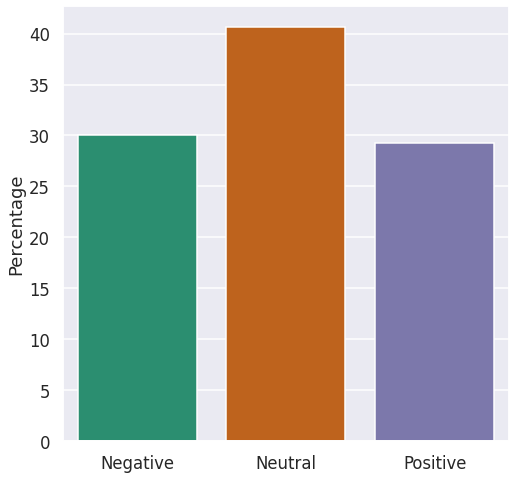

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [ ]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('bjp', 139),
 ('congress', 72),
 ('indian', 69),
 ('national', 65),
 ('party', 54),
 ('india', 36),
 ('bihar', 23),
 ('leader', 20),
 ('supporters', 16),
 ('elections', 13),
 ('covid', 11),
 ('free', 10),
 ('going', 9),
 ('says', 9),
 ('today', 9),
 ('president', 9),
 ('gandhi', 9),
 ('care', 8),
 ('promises', 8),
 ('always', 8)]

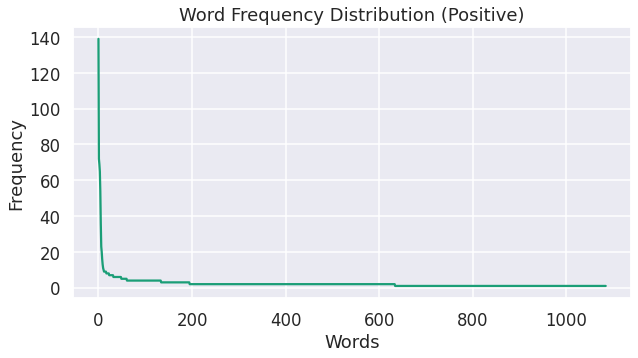

In [ ]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

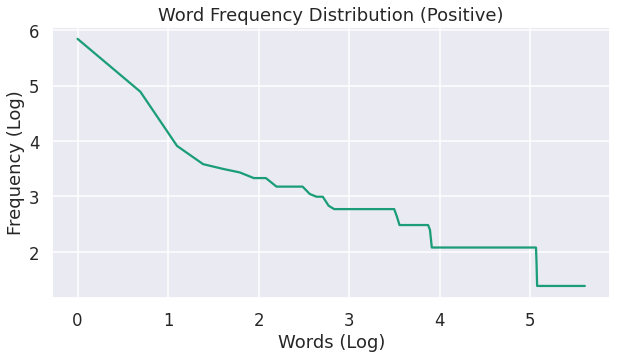

In [ ]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [ ]:
neg_lines = list(df[df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('bjp', 181),
 ('indian', 34),
 ('congress', 33),
 ('national', 27),
 ('leader', 24),
 ('rape', 19),
 ('hindu', 18),
 ('mla', 15),
 ('hathras', 14),
 ('bengal', 13),
 ('bad', 13),
 ('people', 12),
 ('india', 12),
 ('bihar', 12),
 ('govt', 11),
 ('police', 11),
 ('victim', 10),
 ('says', 10),
 ('arrested', 10),
 ('killed', 9)]

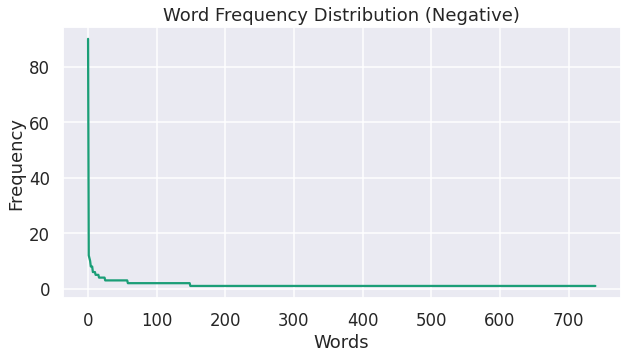

In [ ]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

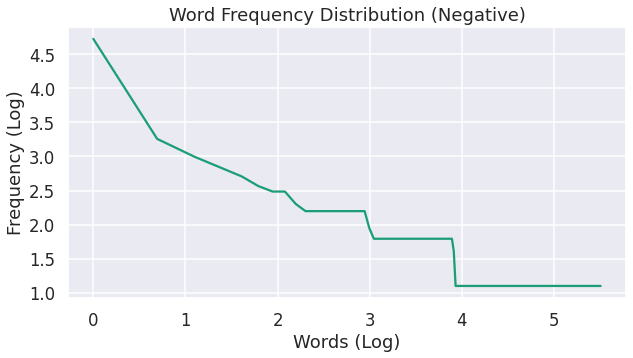

In [ ]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()